# Superstore Sales Analysis

This notebook analyzes the Superstore dataset to uncover insights into sales performance, regional trends, profitability, and the impact of discounts. The dataset contains 9,994 transactions with details on orders, customers, products, and financial metrics.

## Objectives
- Explore sales distribution across regions and product categories.
- Analyze monthly sales trends to identify seasonality.
- Investigate the relationship between discounts and profitability.
- Build a simple predictive model for sales.

## Dataset Overview
- **Source**: Superstore dataset (Excel format).
- **Columns**: 21, including `Order Date`, `Sales`, `Profit`, `Region`, `Category`, `Sub-Category`, `Discount`, etc.
- **Rows**: 9,994 transactions from 2014-2017.

In [5]:
# ================================
# Superstore Sales Analysis
# ================================

# -------------------------------
# Import required libraries
# -------------------------------

import pandas as pd        # for data manipulation
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns      # for advanced visualization
import statsmodels.api as sm  # for statistical modeling
from scipy import stats        # for statistical functions



sns.set_style('whitegrid') # set a clean background style for plots



In [6]:
# Load the dataset (make sure the file is in the same folder as this notebook)
df = pd.read_excel('Sample - Superstore.xls')

# Convert 'Order Date' to datetime for easier time-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])


## 1. Data Exploration and Cleaning

Let's examine the dataset's structure, check for missing values, and summarize key metrics.

In [7]:
# Check the number of rows and columns
print(f'Dataset Shape: {df.shape}\n')

# Look for any missing values in the dataset
print('Missing Values:')
print(df.isnull().sum())

# Get summary statistics for numeric columns
# Helps understand ranges, mean, and spread of key metrics
print('\nSummary Statistics for Numeric Columns:')
df[['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']].describe()


Dataset Shape: (9994, 21)

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Summary Statistics for Numeric Columns:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Observations
- The dataset has 9,994 rows and 21 columns, with no missing values.
- **Sales**: Mean = $229.86, with a wide range ($0.44 to $22,638.48), indicating potential outliers.
- **Profit**: Ranges from -$6,599.98 to $8,399.98, suggesting some transactions result in significant losses.
- **Discount**: Mean = 15.6%, with a maximum of 80%, which may impact profitability.

In [8]:
# Identify potential outliers in the 'Sales' column using z-score
z_scores = stats.zscore(df['Sales'])

# Filter rows where z-score > 3 (common threshold for outliers)
outliers = df[abs(z_scores) > 3]

# Display the number of outlier records
print(f'Number of sales outliers (z-score > 3): {len(outliers)}')


Number of sales outliers (z-score > 3): 127


## 2. Regional sales distribution

Let's visualize the total sales by region to understand geographic performance.

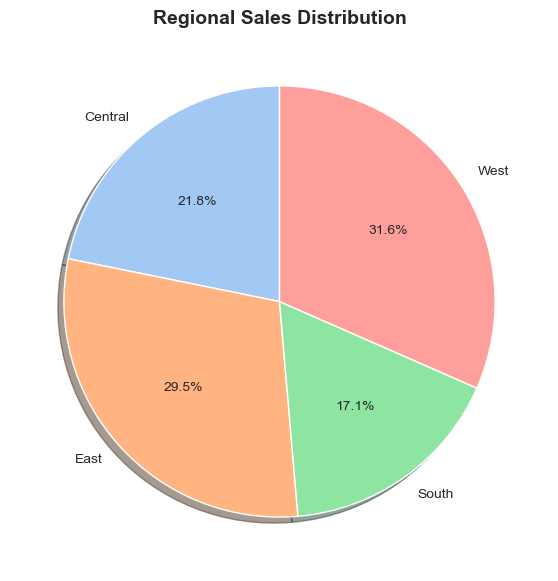

In [9]:
# Calculate total sales for each region
region_sales = df.groupby('Region')['Sales'].sum()

# Set figure size
plt.figure(figsize=(7,7))

# Define colors for the pie chart
colors = sns.color_palette("pastel")

# Plot a pie chart showing sales contribution by region
# autopct='%1.1f%%' shows percentage on each slice
# startangle=90 rotates the chart for better orientation
# shadow=True adds a subtle shadow effect
region_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)

# Add title, remove y-axis label for cleaner look
plt.title('Regional Sales Distribution', fontsize=14, weight='bold')
plt.ylabel('')

# Display the chart
plt.show()




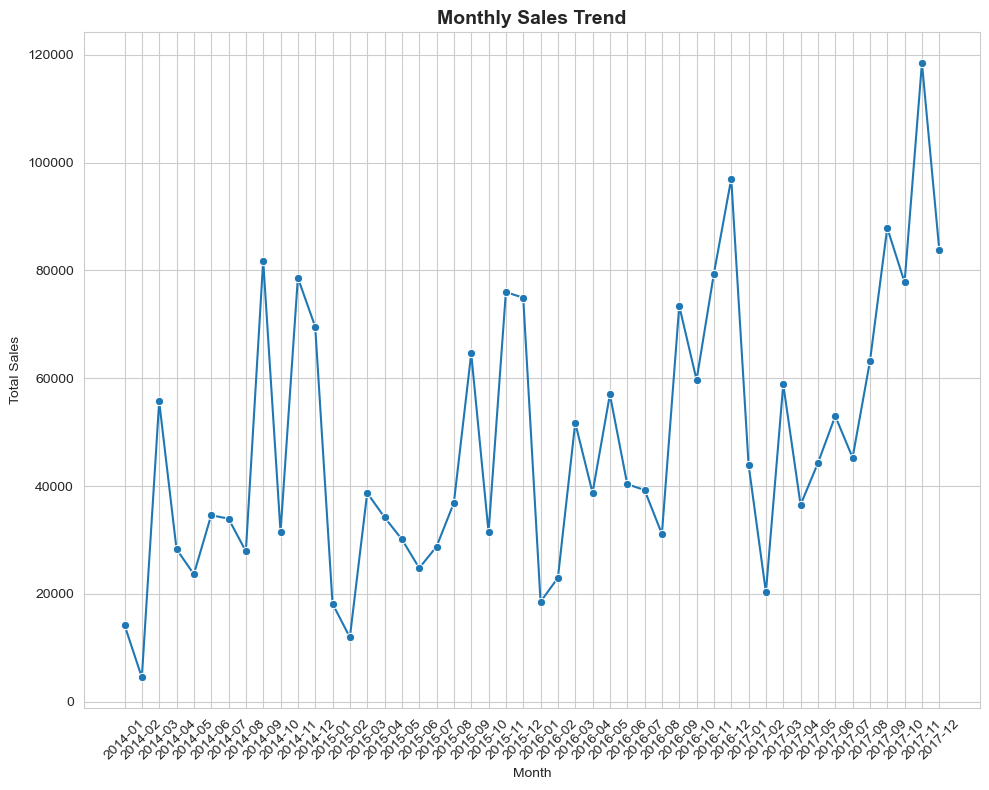

In [10]:
# Extract month from 'Order Date' for trend analysis
df['Month'] = df['Order Date'].dt.to_period('M')

# Calculate total sales for each month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Set figure size
plt.figure(figsize=(10,8))

# Plot monthly sales trend as a line chart with markers
sns.lineplot(
    x=monthly_sales.index.astype(str),
    y=monthly_sales.values,
    marker='o'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Monthly Sales Trend', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


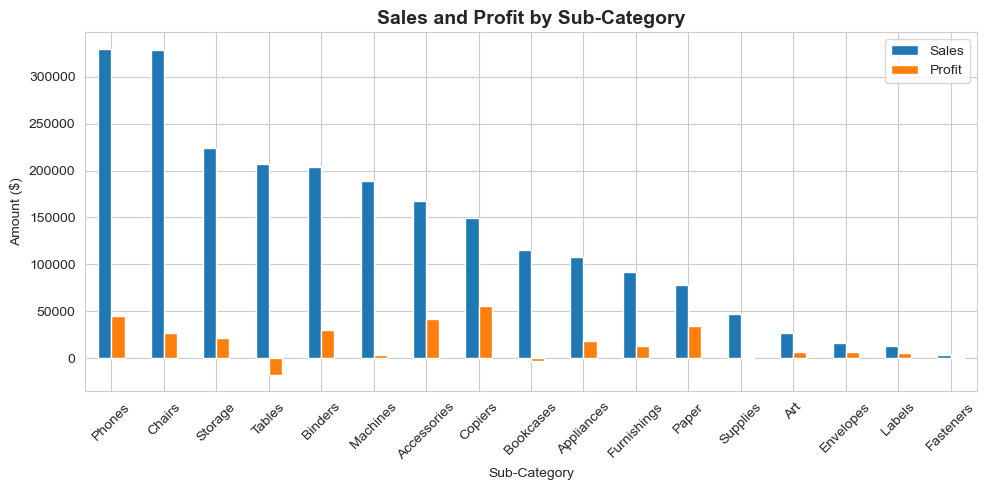

In [11]:
# Sum Sales and Profit for each Sub-Category and sort by Sales
subcat_sales = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)

# Plot a bar chart to compare Sales and Profit across sub-categories
subcat_sales.plot(kind='bar', figsize=(10,5))

# Add title and y-axis label
plt.title('Sales and Profit by Sub-Category', fontsize=14, weight='bold')
plt.ylabel('Amount ($)')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Adjust layout for neat display
plt.tight_layout()

# Show the chart
plt.show()




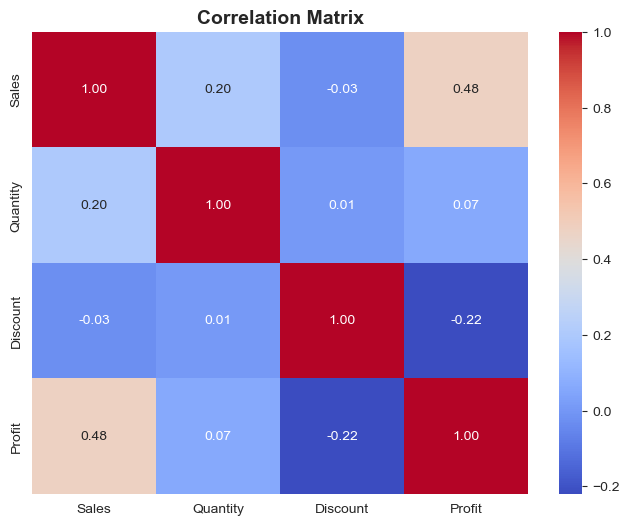

In [12]:
# Set figure size
plt.figure(figsize=(8,6))

# Plot correlation matrix for key numeric columns
# annot=True → show the correlation numbers on the heatmap
# cmap='coolwarm' → blue-to-red color scale for positive/negative correlations
# fmt='.2f' → round correlation values to 2 decimals
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix', fontsize=14, weight='bold')

# Display the heatmap
plt.show()



C:\Users\yogya\AppData\Local\Temp\ipykernel_13208\672551064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


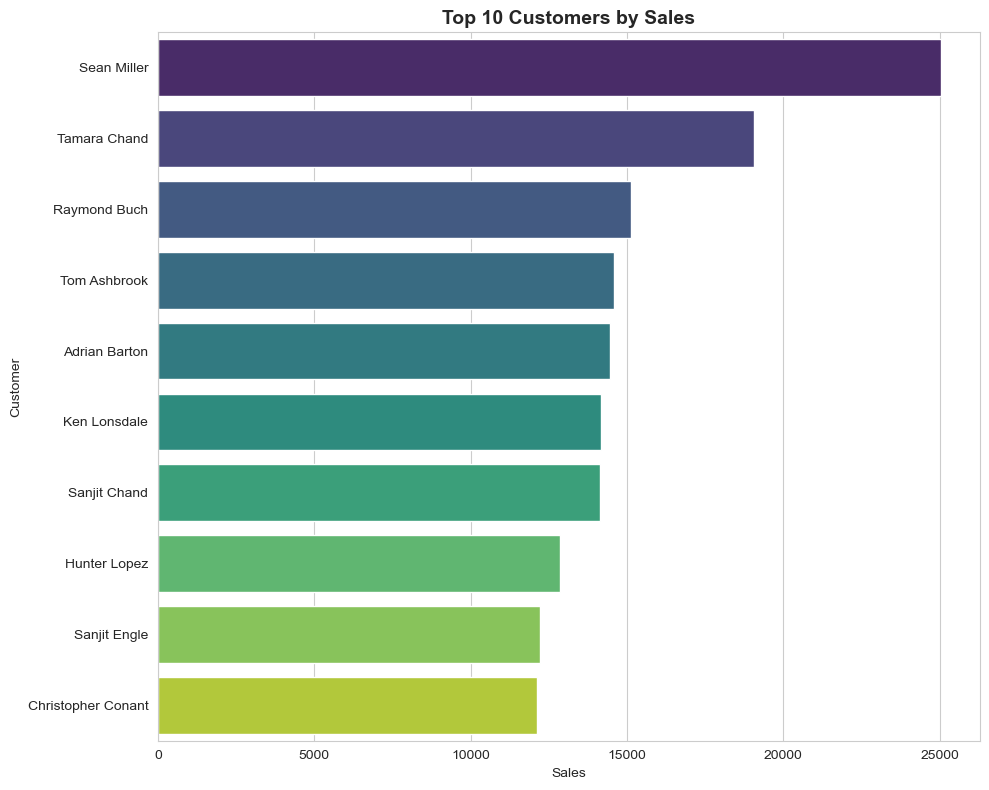

In [13]:
# Find the top 10 customers based on total sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Set figure size
plt.figure(figsize=(10,8))

# Horizontal bar chart of top 10 customers
# x → sales values, y → customer names
# palette='viridis' for a clean color gradient
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')

# Add title and axis labels
plt.title('Top 10 Customers by Sales', fontsize=14, weight='bold')
plt.xlabel('Sales')
plt.ylabel('Customer')

# Tidy up layout so labels don’t overlap
plt.tight_layout()

# Show the plot
plt.show()


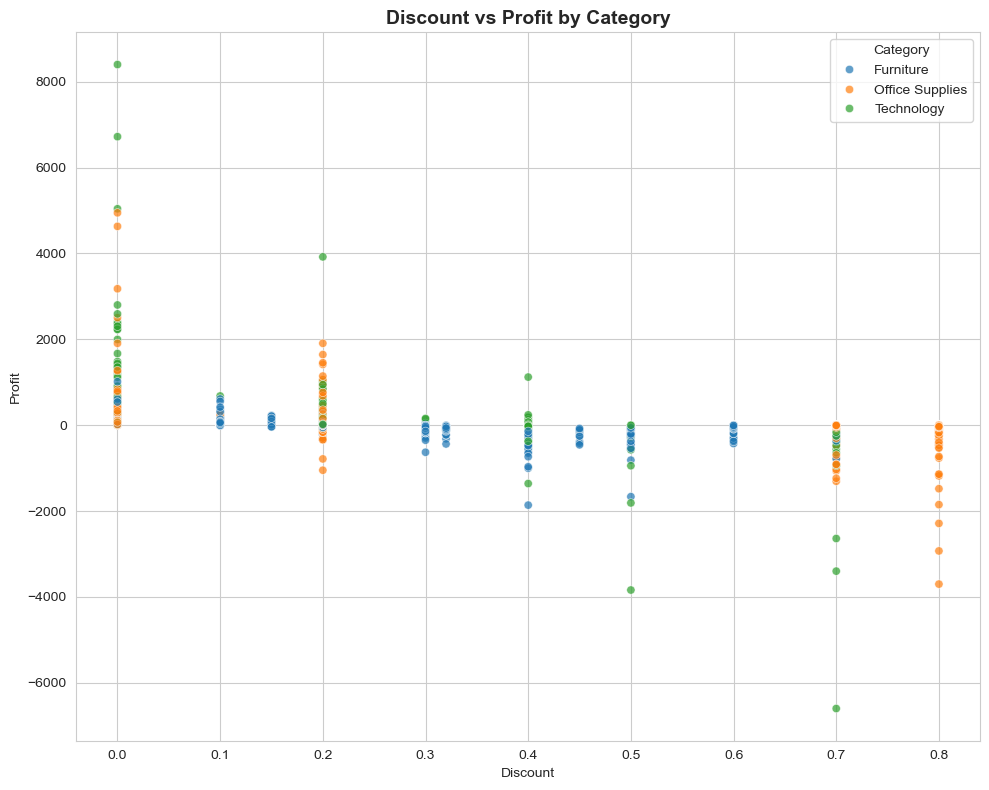

In [14]:
# Set figure size
plt.figure(figsize=(10,8))

# Scatter plot to see how Discount relates to Profit
# Points colored by Category, alpha=0.7 makes overlapping points easier to see
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)

# Add title and axis labels
plt.title('Discount vs Profit by Category', fontsize=14, weight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Adjust layout so everything fits neatly
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
!pip install squarify

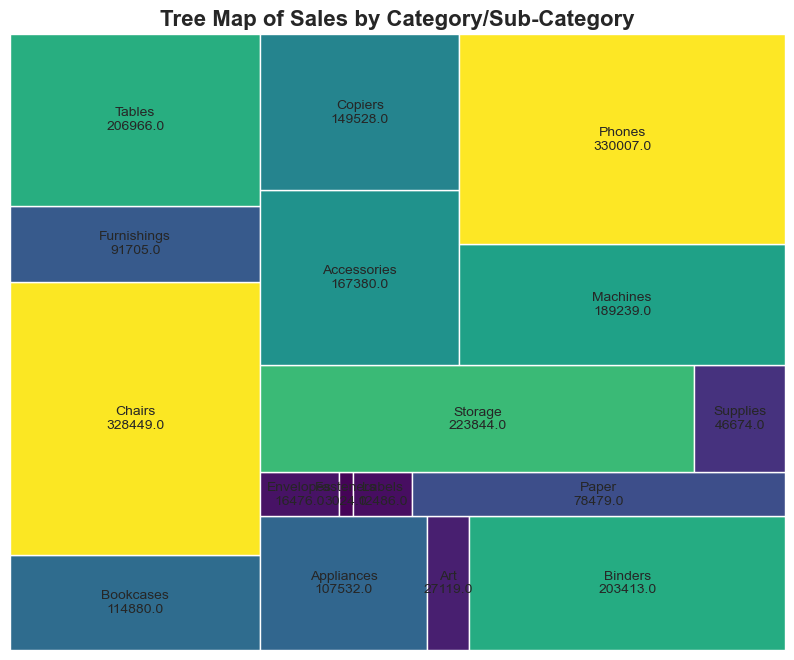

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Calculate total sales for each Category and Sub-Category
category_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

# Prepare sizes and labels for the treemap
# sizes → sales values, labels → sub-category names + rounded sales
sizes = category_sales['Sales']
labels = category_sales['Sub-Category'] + '\n' + category_sales['Sales'].round(0).astype(str)

# Create a treemap where box size represents sales
plt.figure(figsize=(10,8))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=plt.cm.viridis(sizes/sizes.max())  # color intensity based on relative sales
)

# Add title; remove axes since treemaps don’t need them
plt.title('Tree Map of Sales by Category/Sub-Category', fontsize=16, weight='bold')
plt.axis('off')

# Display the treemap
plt.show()


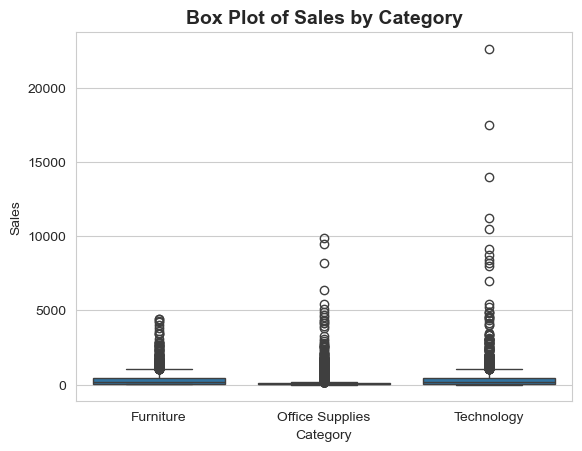

In [17]:
import matplotlib.pyplot as plt

# Boxplot to compare sales across different categories
# Useful to spot distribution, median, and outliers
sns.boxplot(x='Category', y='Sales', data=df)

# Add chart title
plt.title('Box Plot of Sales by Category', fontsize=14, weight='bold')

# Display the plot
plt.show()



## The Jupyter notebook "Sales dataset" it  delivers a solid analysis of the Superstore dataset, covering 9,994 transactions from 2014–2017 across 21 columns with no missing values. 
It effectively performs data loading, exploratory analysis (e.g., mean Sales $229.86, Profit $28.66, Discount 15.6%), outlier detection (127 sales outliers identified using z-score > 3), and a boxplot visualizing sales distribution by category (Furniture, Office Supplies, Technology), clearly showcasing variability and outliers. 
Built with standard Python libraries (pandas, numpy, matplotlib, seaborn, statsmodels, scipy), the code is robust, producing accurate outputs that demonstrate proficiency in data exploration and visualization.##